# Projet 4 :

# Anticipez les besoins en consommation de bâtiments

# Notebook de l'analyse exploratoire et nettoyage

# Salma CHAFAI

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.

**Résumé du projet**

On cherche à atteindre l'objectif de ville neutre en émissions de carbone en 2050 pour la ville de Seattle. Notre équipe va s'intéresser de près aux émissions des bâtiments non destinés à l'habitation.
Les relevés obtenus en 2016 ont été efféctués par des agents et ils sont coûteux à obtenir. L'objectif est de prédire les émissions de C02 et la consommation totale d'énergie de bâtiments pour lesquels elles n'ont pas encore été mesurées.

## A) Importation des bibliothèques essentiels

### 1- Les bibliothèques usuelles et les bibliothèques de visualisation

In [2]:
 # ça nous permet d'importer numpy avec son nom np et matplotlib.pyplot as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import seaborn as sns

In [4]:
import missingno as msn
# Librairie plotly pour les graphiques intéractives
import plotly.graph_objects as go
import plotly as plo
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot
from plotly.subplots import make_subplots

### 2- Les bibliothèques pour l'imputation

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer

## B) Le jeu de données

In [33]:
dataElec = pd.read_csv("C:/Users/salma/OneDrive/Bureau/Formation en alternance 2021_2023/Formation OpenClassRooms/Projets/Projet 4/projet_nouvelle_version/Data/2016_Building_Energy_Benchmarking.csv", sep=',')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
dataElec.head(7)

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0              1      2016      NonResidential               Hotel   
1              2      2016      NonResidential               Hotel   
2              3      2016      NonResidential               Hotel   
3              5      2016      NonResidential               Hotel   
4              8      2016      NonResidential               Hotel   
5              9      2016  Nonresidential COS               Other   
6             10      2016      NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   
5                West Precinct  810 Virginia St  Seattle    WA  98101.0   
6                       Camlin  1619 9th Avenue  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   
5                    0660000560                    7     DOWNTOWN  47.61623   
6                    0660000825                    7     DOWNTOWN  47.61390   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   
5 -122.33657       1999                1.0               2             97288   
6 -122.33283       1926                1.0              11             83008   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   
5               37198                   60090                 Police Station   
6                   0                   83008                          Hotel   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   
5         Police Station                    88830.0   
6                  Hotel                    81352.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   
5                          NaN                              NaN   
6               

In [34]:
# Taille du jeu de données 
dataElec.shape

(3376, 46)

## C) Analyse exploratoire des données (EDA) et filtrage

### 1- Analyse de la forme des données

#### (a) La signification des différentes variables

**Description des variables:**

- **OSEBuildingID** : Un identifiant unique attribué à chaque propriété couverte par la Seattle Benchmarking Ordinance à des fins de suivi et d'identification.


- **DataYear** : Année civile (janvier-décembre) représentée par chaque enregistrement de données.


- **BuildingType** : Classification des types de bâtiments de la ville de Seattle.


- **PrimaryPropertyType** : L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'usage principal est défini comme une fonction qui représente plus de 50 % d'un bien. Il s'agit du champ Type de propriété - EPA calculée de Portfolio Manager.


- **PropertyName** : Nom de propriété officiel ou commun tel qu'il est saisi dans le gestionnaire de portefeuille de l'EPA.


- **TaxParcelldentificationNumber** : Code PIN du comté de King


- **CouncilDistrictCode** : Propriété District du conseil de la ville de Seattle.


- **Neighborhood** : Zone de voisinage de propriété définie par le département des quartiers de la ville de Seattle.


- **YearBuilt** : Année au cours de laquelle une propriété a été construite ou a fait l'objet d'une rénovation complète.


- **NumberOfBuildings** : Nombre de bâtiments inclus dans le rapport de la propriété. Dans les cas où une propriété est signalée comme un campus, plusieurs bâtiments peuvent être inclus dans un seul rapport.


- **NumberofFloors** : Nombre d'étages signalés dans Portfolio Manager.


- **PropretyGFATotal** : Surface de plancher brute totale du bâtiment et du stationnement.


- **PropriétéGFAParking** : Espace total en pieds carrés de tous les types de stationnement (entièrement fermé, partiellement fermé et ouvert).


- **PropertyGFABuilding(s)** : Espace au sol total en pieds carrés entre les surfaces extérieures des murs d'enceinte d'un bâtiment. Cela comprend toutes les zones à l'intérieur du ou des bâtiments, telles que l'espace des locataires, les espaces communs, les cages d'escalier, les sous-sols, le stockage, etc.


- **ListOfAllPropertyUseTypes** :	 Toutes les utilisations de la propriété signalées dans Portfolio Manager


- **LargestPropertyUseType** : La plus grande utilisation d'une propriété (par exemple, bureau, magasin de détail) par GFA.


- **LargestPropertyUseTypeGFA** : La surface de plancher brute (GFA) de la plus grande utilisation de la propriété.

(Pareil pour second... and third....)



- **YearsENERGYSTARCertified** : Depuis des années, la propriété a reçu la certification ENERGY STAR.


- **ENERGYSTARScore** : Une EPA a calculé une note de 1 à 100 qui évalue la performance énergétique globale d'une propriété, sur la base de données nationales pour contrôler les différences entre le climat, les utilisations des bâtiments et les opérations. Un score de 50 représente la médiane nationale.


- **SiteEUI(kBtu/sf)** : L'intensité de consommation d'énergie du site (IUE) est la consommation d'énergie du site d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie du site est le montant annuel de toute l'énergie consommée par la propriété sur le site, tel qu'indiqué sur les factures de services publics. L'IE du site est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.


- **SiteEUIWN(kBtu/sf)** : L'intensité de consommation d'énergie du site (EUI) normalisée par les conditions météorologiques (WN) est l'énergie du site WN d'une propriété divisée par sa surface de plancher brute (en pieds carrés). L'énergie du site WN est la consommation d'énergie du site que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. L'IUE du site WN est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.


- **SourceEUI(kBtu/sf)** : L'intensité de consommation d'énergie à la source (IUE) est la consommation d'énergie à la source d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie à la source est l'énergie annuelle utilisée pour faire fonctionner la propriété, y compris les pertes de production, de transmission et de distribution. Source EUI est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.


- **SourceEUIWN(kBtu/sf)** : L'intensité d'utilisation de l'énergie à la source (EUI) normalisée par les conditions météorologiques (WN) est l'énergie à la source WN d'une propriété divisée par sa surface de plancher brute. L'énergie à la source WN est l'utilisation de l'énergie à la source que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. WN Source EUI est mesuré en milliers d'unités thermiques britanniques (kBtu) par pied carré.


- **SiteEnergyUse(kBtu)** : La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie.


- **SiteEnergyUseWN(kBtu)** : La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie, ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans.


- **SteamUse(kBtu)** : La quantité annuelle de vapeur de quartier consommée par la propriété sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).


- **Electricity(kWh)** : La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en kWh.


- **Electricity(kBtu)** : La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).


- **NaturalGas(therms)** : La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en thermes.


- **NaturalGas(kBtu)** : 	La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).


- **DefaultData** : La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété.


- **Comments** : Commentaires du propriétaire ou de l'agent d'un immeuble pour mettre en contexte la consommation d'énergie de l'immeuble.


- **ComplianceStatus** : Si une propriété a satisfait aux exigences d'analyse comparative énergétique pour l'année de déclaration en cours.


- **Outlier** : Si une propriété est une valeur aberrante élevée ou basse (O/N)


- **TotalGHGEmissions** : La quantité totale d'émissions de gaz à effet de serre, y compris le dioxyde de carbone, le méthane et les gaz d'oxyde nitreux libérés dans l'atmosphère en raison de la consommation d'énergie de la propriété, mesurée en tonnes métriques d'équivalent en dioxyde de carbone. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources de production de Seattle City Light. Cela utilise le facteur d'émissions 2015 de Seattle City Light de 52,44 lb CO2e/MWh jusqu'à ce que le facteur 2016 soit disponible. Facteur de vapeur Enwave = 170,17 lb CO2e/MMBtu. Facteur de gaz provenant de EPA Portfolio Manager = 53,11 kg CO2e/MBtu.


- **GHGEmissionsIntensity** : Émissions totales de gaz à effet de serre divisées par la surface de plancher brute de la propriété, mesurée en kilogrammes d'équivalent en dioxyde de carbone par pied carré. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources de production de Seattle City Light.

#### (b) Identification de la target

Dans ce jeu de données, on a deux variables à prédire : une sur la consommation total d'énergie et l'autre sur l'émissions de C02. Les deux variables sont respectivement 'TotalGHGEmissions' et 'SiteEnergyUse(kBtu)'

#### (c) Informations sur le jeu de données

In [35]:
# Taille du jeu de données
print("On a :", dataElec.shape[0], "lignes et", dataElec.shape[1], "colonnes")

On a : 3376 lignes et 46 colonnes


In [36]:
# Le type des variables
dataElec.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [37]:
# Le nombre des types des variables
dataElec.dtypes.value_counts() 

float64    22
object     15
int64       8
bool        1
dtype: int64

On remarque qu'on a 30 variables quantitatives et 16 variables qualitatives

### 2- Filtrage

#### (a) Type des bâtiments

Avant de commencer notre analyse exploratoire, dans ce projet, on va s'intéresser aux bâtiments non résidentiels et donc on va filtrer notre jeu de données sur ces bâtiments là (en utilisant la variable "BuildingType") :

<AxesSubplot:ylabel='BuildingType'>

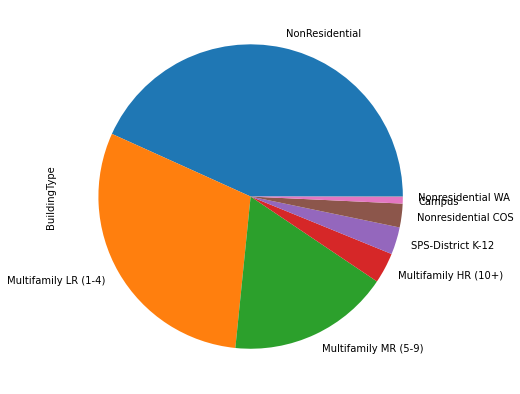

In [38]:
plt.figure(figsize=(10,7))
dataElec['BuildingType'].value_counts().plot.pie()

In [39]:
df_filtre = dataElec[dataElec['BuildingType'].isin(['NonResidential','Nonresidential COS','SPS-District K-12'])]
df_filtre.shape

(1643, 46)

On a supprimé les bâtiments occupés par les familles et on a aussi supprimé 'Nonresidential WA' car on a un seul bâtiment qui prend cette valeur.

In [40]:
df_filtre['BuildingType'].value_counts()

NonResidential        1460
SPS-District K-12       98
Nonresidential COS      85
Name: BuildingType, dtype: int64

On remarque qu'on passe de 3376 lignes à 1667 lignes

#### (b) Filtrage sur la variable ComplianceStatus

In [41]:
df_filtre['ComplianceStatus'].value_counts()

Compliant                       1523
Error - Correct Default Data      88
Non-Compliant                     18
Missing Data                      14
Name: ComplianceStatus, dtype: int64

In [42]:
# Et ensuite, on filtre sur les bâtiments qui ont un statut compliant et on supprime après la variable ComplianceStatus
df_filtre = df_filtre[df_filtre['ComplianceStatus'] == 'Compliant']
df_filtre = df_filtre.drop('ComplianceStatus', axis=1)
df_filtre.shape

(1523, 45)

On se retrouve à la fin avec un jeu de données de 1523 lignes

### 3- Identification des valeurs manquantes

<AxesSubplot:>

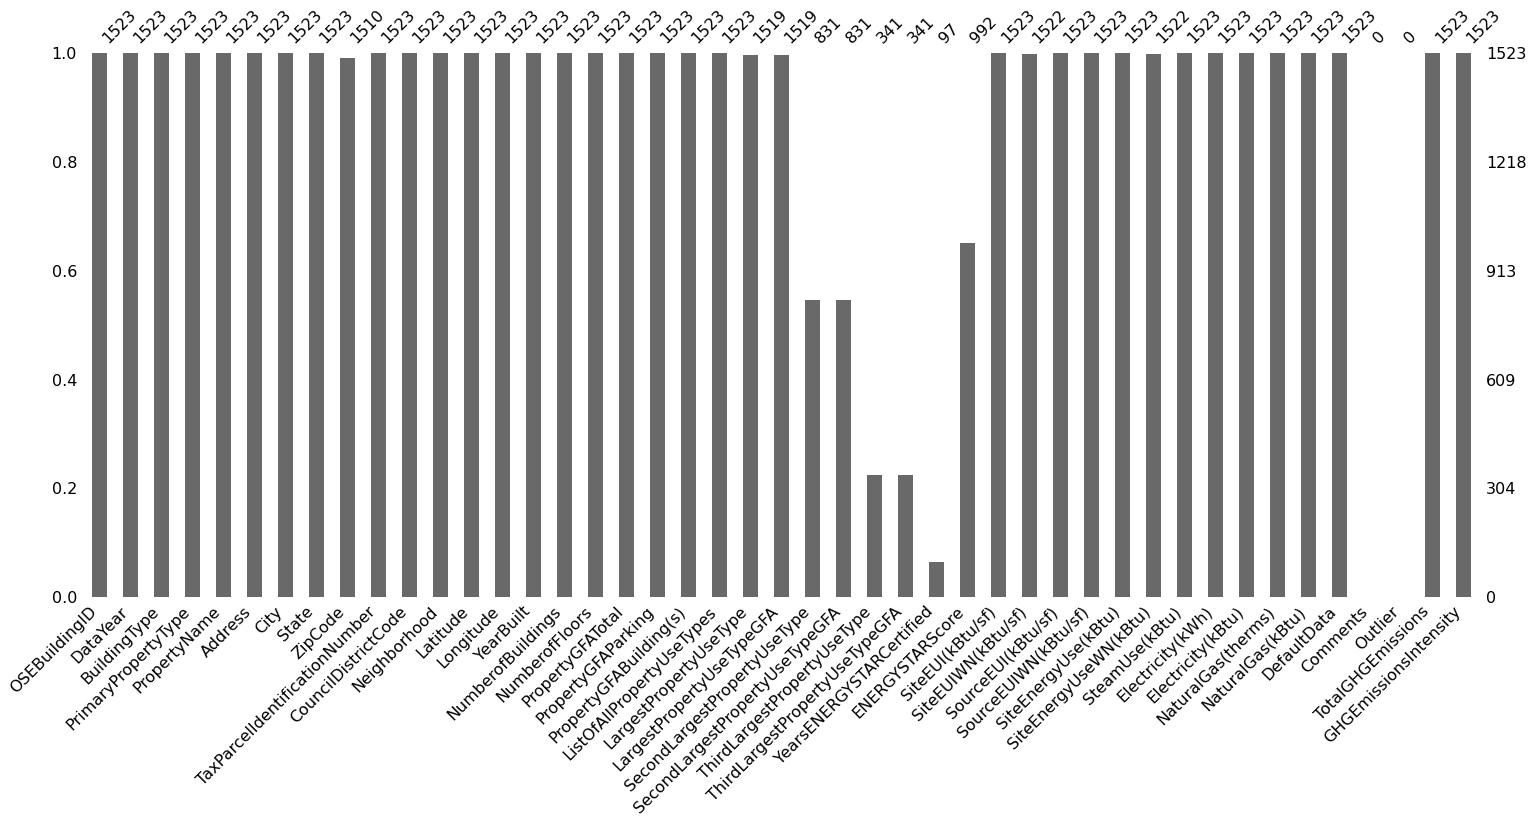

In [46]:
# Taux de remplissage des colonnes
plt.figure(figsize=(7,7))
msn.bar(df_filtre)

<AxesSubplot:>

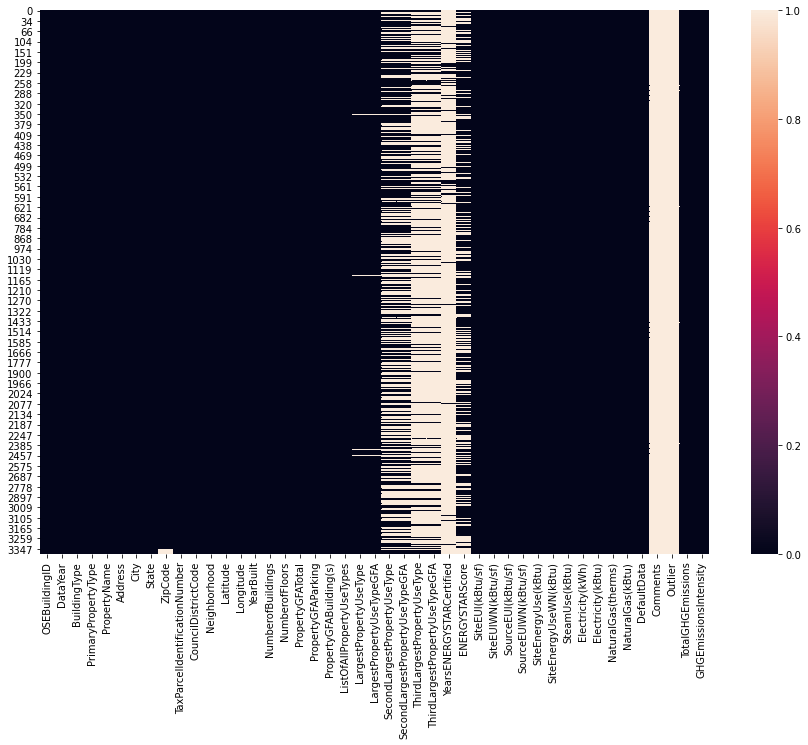

In [47]:
# ça nous permet de visualiser les valeurs manquantes en affichant tout le jeu de données
plt.figure(figsize = (15,10))
sns.heatmap(df_filtre.isna())

On remarque qu'il y des variables qui sont vides, d'autres contiennent beaucoup de valeurs manquantes (plus que 50%). On les supprimera et on les imputera dans la partie du nettoyage

In [48]:
# On calcule le taux de valeurs manquantes
((df_filtre.isna().sum()/df_filtre.shape[0])*100).sort_values(ascending = False)

Outlier                            100.000000
Comments                           100.000000
YearsENERGYSTARCertified            93.630991
ThirdLargestPropertyUseType         77.609980
ThirdLargestPropertyUseTypeGFA      77.609980
SecondLargestPropertyUseType        45.436638
SecondLargestPropertyUseTypeGFA     45.436638
ENERGYSTARScore                     34.865397
ZipCode                              0.853578
LargestPropertyUseTypeGFA            0.262640
LargestPropertyUseType               0.262640
SiteEUIWN(kBtu/sf)                   0.065660
SiteEnergyUseWN(kBtu)                0.065660
State                                0.000000
TaxParcelIdentificationNumber        0.000000
NumberofFloors                       0.000000
CouncilDistrictCode                  0.000000
City                                 0.000000
Address                              0.000000
PropertyName                         0.000000
PrimaryPropertyType                  0.000000
BuildingType                      

On remarque qu'il y a des variables qui ont 100% de valeurs manquantes. On va commencer par supprimer les variables qui ont un taux de valeurs manquantes supérieurs à 80%

In [49]:
def cols_vides(data, pourcentage):
    taux_nan = (data.isna().sum()/data.shape[0])*100
    data_f = data[data.columns[taux_nan < pourcentage]]
    return data_f

In [50]:
df_nett = cols_vides(df_filtre, 80)
df_nett.shape

(1523, 42)

On passe de 46 colonnes à 42 colonnes et on revisualise le taux de remplissage des variables restantes

<AxesSubplot:>

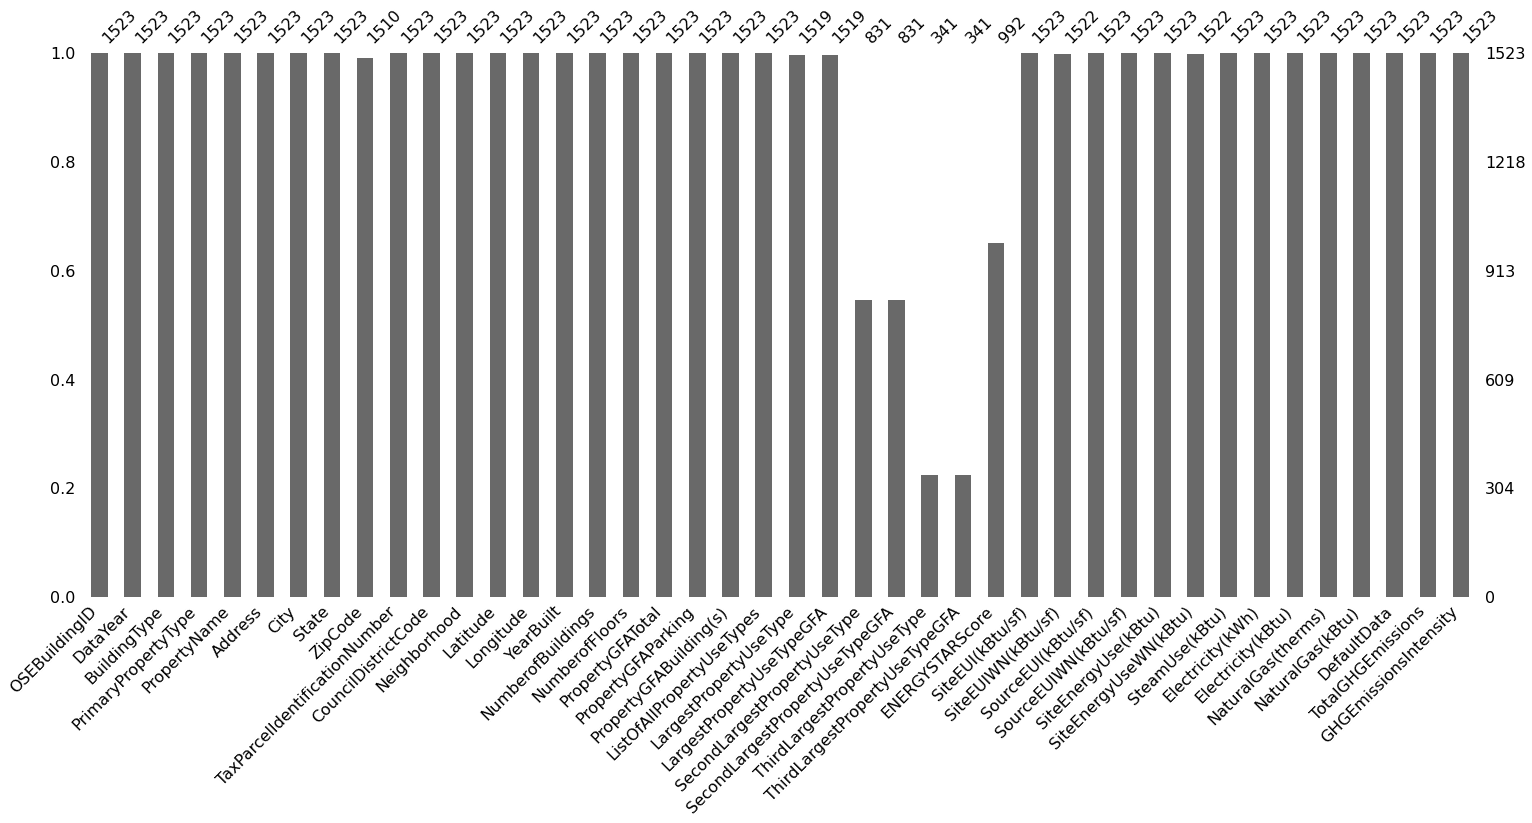

In [51]:
# Taux de remplissage des colonnes après élimination des variables qui ont un taux de remplisage faible
plt.figure(figsize=(7,7))
msn.bar(df_nett)

In [52]:
# On regarde s'il y a des doublons dans le dataset
any(df_nett.duplicated(subset=['OSEBuildingID']))

False

### 4- Suppression des colonnes inutiles 

In [53]:
# Les colonnes restantes
df_nett.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [54]:
df_nett = df_nett.drop(['OSEBuildingID','DataYear','PropertyName','Address','City','State','ZipCode',
                        'TaxParcelIdentificationNumber','CouncilDistrictCode','DefaultData','GHGEmissionsIntensity',
                        'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kWh)',
                       'NaturalGas(therms)'], axis=1)

In [55]:
df_nett.shape

(1523, 26)

In [57]:
df_nett.head()

BuildingType PrimaryPropertyType Neighborhood  Latitude  Longitude  \
0  NonResidential               Hotel     DOWNTOWN  47.61220 -122.33799   
1  NonResidential               Hotel     DOWNTOWN  47.61317 -122.33393   
2  NonResidential               Hotel     DOWNTOWN  47.61393 -122.33810   
3  NonResidential               Hotel     DOWNTOWN  47.61412 -122.33664   
4  NonResidential               Hotel     DOWNTOWN  47.61375 -122.34047   

   YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0       1927                1.0              12             88434   
1       1996                1.0              11            103566   
2       1969                1.0              41            956110   
3       1926                1.0              10             61320   
4       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0             60.0           84.300003            189.000000   
1             61.0           97.900002            179.399994   
2             43.0           97.699997            244.100006   
3             56.0          113.300003            224.000000   
4             75.0          118.699997            215.600006   

   SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0            7226362.5      2003882.00          3946027.0         1276453.0   
1            8387933.0            0.00          3242851.0         5145082.0   
2           72587024.0     21566554.00         49526664.0         1493800.0   
3            6794584.0      2214446.25          2768924.0         1811213.0   
4           14172606.0            0.00          5368607.0         8803998.0   

   TotalGHGEmissions  
0             249.98  
1             295.86  
2            2089.28  
3             286.43  
4             505.01

In [56]:
col_restante = df_nett.columns.tolist()
col_restante

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions']

### 5- Analyse exploratoire des données

On commence par séparer nos variables en deux catégories : numériques et catégorielles

In [58]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
var_num  = pd.DataFrame(df_nett.select_dtypes(include=numerics)).columns.tolist()

In [59]:
cat = ['object','bool']
var_cat = pd.DataFrame(df_nett.select_dtypes(include=cat)).columns.tolist()

Puis on sépare les numériques en variables discrètes et continues

In [60]:
var_disc = [ 'YearBuilt','NumberofBuildings','NumberofFloors']
var_cont = ['PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',
            'SecondLargestPropertyUseTypeGFA','ENERGYSTARScore',
            'SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)',
            'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)',
            'TotalGHGEmissions']

In [61]:
target1 = 'SiteEnergyUse(kBtu)'
target2 = 'TotalGHGEmissions'

#### (a) Visualisation  des deux variables cibles (nos deux targets)

In [63]:
def histogramme(data, colonne) :
    fig = px.histogram(data, x=colonne).update_xaxes(categoryorder = 'total descending')
    fig.show()

In [64]:
def boxplots(data, colonne):
    fig = px.box(data, x=colonne)
    fig.show()

**La variable cible 'SiteEnergyUseWN(kBtu)'**

In [65]:
df_nett[df_nett['SiteEUIWN(kBtu/sf)'] <= 0]

BuildingType          PrimaryPropertyType           Neighborhood  \
220   NonResidential                 Large Office               DOWNTOWN   
247   NonResidential                 Large Office               DOWNTOWN   
284   NonResidential                 Large Office               DOWNTOWN   
350   NonResidential  Small- and Mid-Sized Office  MAGNOLIA / QUEEN ANNE   
882   NonResidential             Worship Facility              Northwest   
953   NonResidential             Worship Facility              NORTHEAST   
3275  NonResidential                   University              NORTHEAST   
3277  NonResidential                   University              NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
220   47.60370 -122.33447       1958                1.0              17   
247   47.61695 -122.32965       1988                1.0              20   
284   47.60923 -122.33625       1929                1.0              15   
350   47.62014 -122.35768       1971                1.0               5   
882   47.67572 -122.32850       1910                1.0               2   
953   47.68752 -122.29852       2000                1.0               2   
3275  47.65395 -122.30584       1969                1.0               4   
3277  47.65356 -122.30613       1998                1.0               6   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
220             378525               84600                  293925   
247             497513              118744                  378769   
284             151039                   0                  151039   
350              88000               21600                   66400   
882              23931                   0                   23931   
953              31386                   0                   31386   
3275             58779                   0                   58779   
3277            203030                   0                  203030   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
220            Office, Parking                 Office   
247            Office, Parking                 Office   
284                     Office                 Office   
350            Office, Parking                 Office   
882           Worship Facility       Worship Facility   
953           Worship Facility       Worship Facility   
3275        College/University     College/University   
3277        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
220                    236827.0                      Parking   
247                    367623.0                      Parking   
284                    125473.0                          NaN   
350                     69691.0                      Parking   
882                     23931.0                          NaN   
953                     30000.0                          NaN   
3275                    58779.0                          NaN   
3277                   203030.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
220                           83311.0                  Restaurant   
247                          114510.0                         NaN   
284                               NaN                         NaN   
350                           17487.0                         NaN   
882                               NaN                         NaN   
953                               NaN                         NaN   
3275                              NaN                         NaN   
3277                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
220                          14679.0             69.0                 0.0   
247                              NaN             65.0                 0.0   
284                              NaN             84.0                 0.

In [75]:
boxplots(df_nett, target1)

In [76]:
histogramme(df_nett, target1)

On remarque que la plupart des bâtiments ont une consommation d'énergie inférieur à 200M. On a des valeurs aberrantes à partir de 200M.

**La variable cible 'TotalGHGEmissions'**

In [77]:
df_nett[df_nett['TotalGHGEmissions'] <= 0]

BuildingType          PrimaryPropertyType           Neighborhood  \
513   NonResidential  Supermarket / Grocery Store  MAGNOLIA / QUEEN ANNE   
3206  NonResidential  Small- and Mid-Sized Office                CENTRAL   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
513   47.63718 -122.37734       2008                1.0               1   
3206  47.61432 -122.31257       2013                1.0               6   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
513              57176                   0                   57176   
3206             52000                   0                   52000   

                              ListOfAllPropertyUseTypes  \
513   Personal Services (Health/Beauty, Dry Cleaning...   
3206                                             Office   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
513   Supermarket/Grocery Store                    39500.0   
3206                     Office                    48159.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
513                  Retail Store                          15000.0   
3206                          NaN                              NaN   

                            ThirdLargestPropertyUseType  \
513   Personal Services (Health/Beauty, Dry Cleaning...   
3206                                                NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
513                           5500.0             31.0          214.100006   
3206                             NaN            100.0            5.000000   

      SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
513                    0.0         1.252517e+07             0.0   
3206                  -2.1         3.427261e+05             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
513                 0.0               0.0                0.0  
3206          -115417.0               0.0               -0.8

On remarque qu'on a une valeur négative pour la variable cible 'TotalGHGEmissions', on la supprimera par la suite.

In [78]:
boxplots(df_nett, target2)

In [79]:
histogramme(df_nett, target2)

On remarque que la plupart des bâtiments ont une émission de C02 inférieur à 6K. On a des valeurs aberrantes à partir de 6K.

**Les deux targets**

In [80]:
def nuage_points(data, colonne1, colonne2):
    fig = px.scatter(data, x=colonne1, y=colonne2, width=600, height=400)
    fig.show()

In [81]:
nuage_points(df_nett, 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions')

On remarque qu'on a des valeurs aberrantes à partir de 400M pour 'SiteEnergyUse(kBtu)' et 10K pour la target 'TotalGHGEmissions'.

#### (b) Visualisation  de quelques variables intéressantes

**Variables catégoriques**

In [82]:
for col in var_cat :
    histogramme(df_nett, col)

On remarque qu'on a dans la variable 'PrimaryPropertyType' la catégorie 'Low-Rise Multifamily' qu'on a va aussi supprimer par la suite. Pour la variable 'Neighborhood' certaines catégories qui sont en minuscules. On les renommera par la suite.

In [83]:
df_nett['Neighborhood'] = df_nett['Neighborhood'].str.upper()
df_nett['Neighborhood'] =  df_nett['Neighborhood'].replace({'DELRIDGE NEIGHBORHOODS' :'DELRIDGE', 'MAGNOLIA / QUEEN ANNE' :'MAGNOLIA QUEEN ANNE'})
df_nett['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'NORTH', 'DELRIDGE'], dtype=object)

In [84]:
histogramme(df_nett, 'Neighborhood')

**Variables numériques continues**

In [87]:
for col in var_cont :
    histogramme(df_nett, col)

**Variables numériques discrètes**

In [88]:
for col in var_disc :
    boxplots(df_nett, col)

On remarque qu'on a aussi des variables aberrantes pour la variables 'NumberofFloors' à partir de 60 étages et  pour 'NumberofBuildings' à partir de 40

#### (c) Visualisation  de la relation de quelques variables avec les variables cibles

On choisit les variables numériques et catégorielles qu'on veut présenter en fct des deux variables targets

In [89]:
l_var_num = ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','YearBuilt',
             'NumberofBuildings','NumberofFloors','PropertyGFATotal','ENERGYSTARScore',
             'PropertyGFAParking','PropertyGFABuilding(s)']

l_var_cat = ['Neighborhood','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',]

**Par rapport à la consommation d'énergie**

In [106]:
for var in l_var_num :
    nuage_points(df_nett, var, target1)

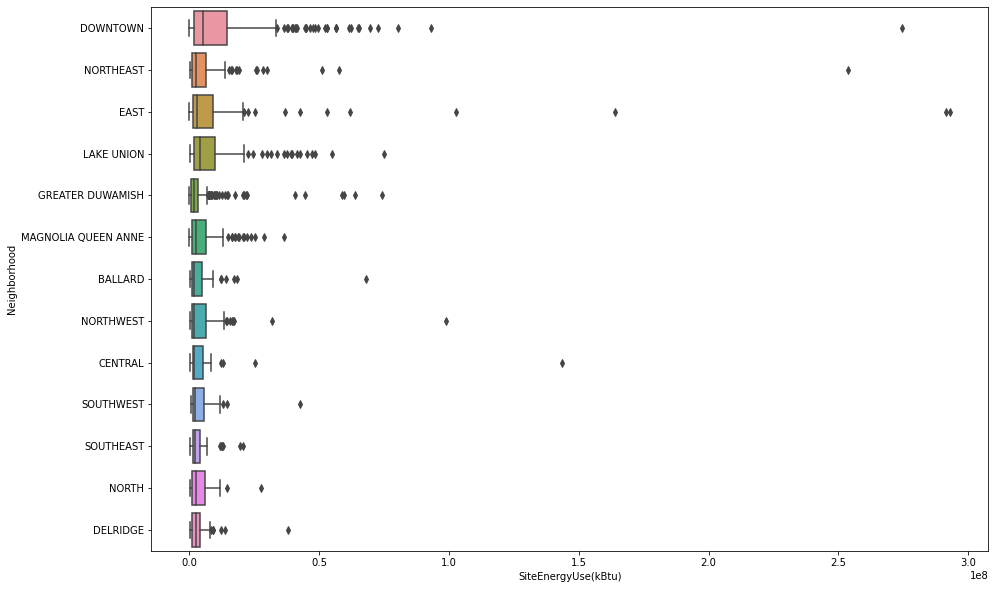

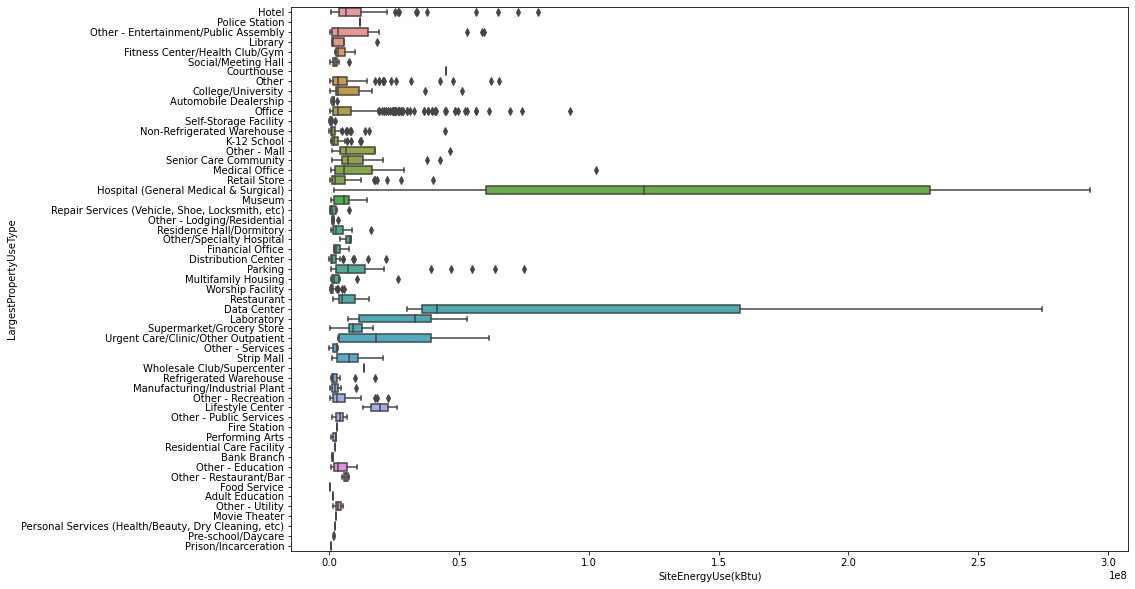

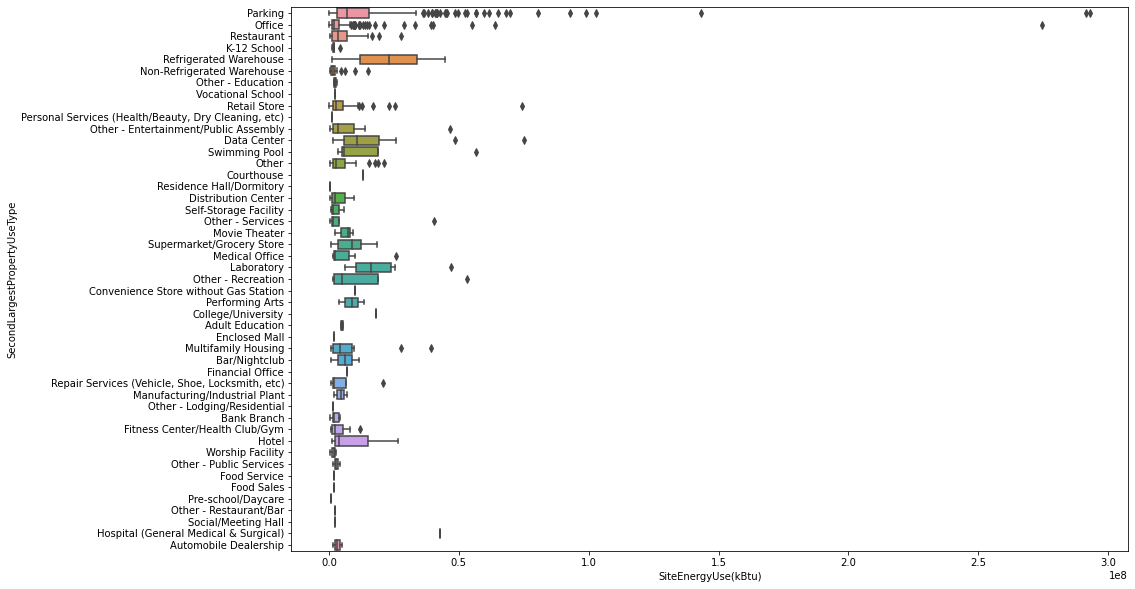

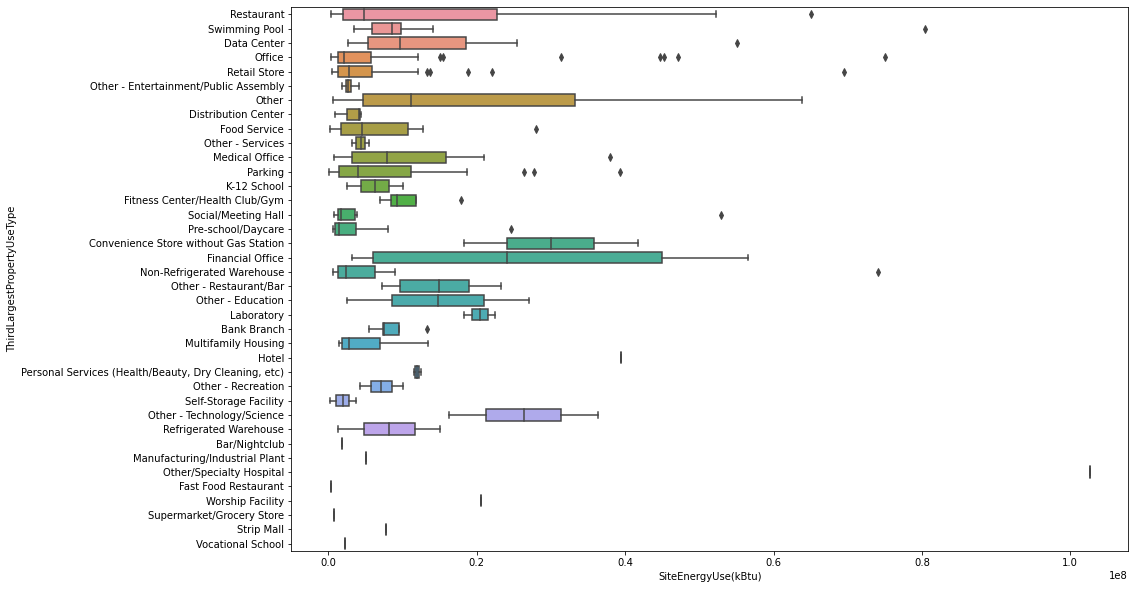

In [91]:
for var in l_var_cat :
    plt.figure(figsize=(15,10))
    sns.boxplot(x=target1, y=var,data=df_nett)

**Par rapport à l'émission de C02**

In [92]:
for var in l_var_num :
    nuage_points(df_nett, var, target2)

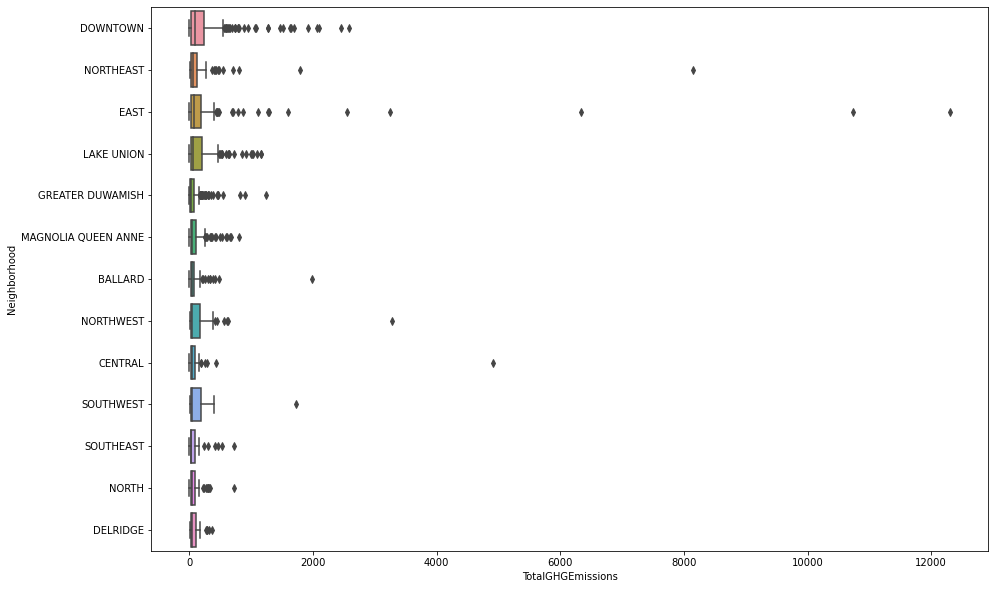

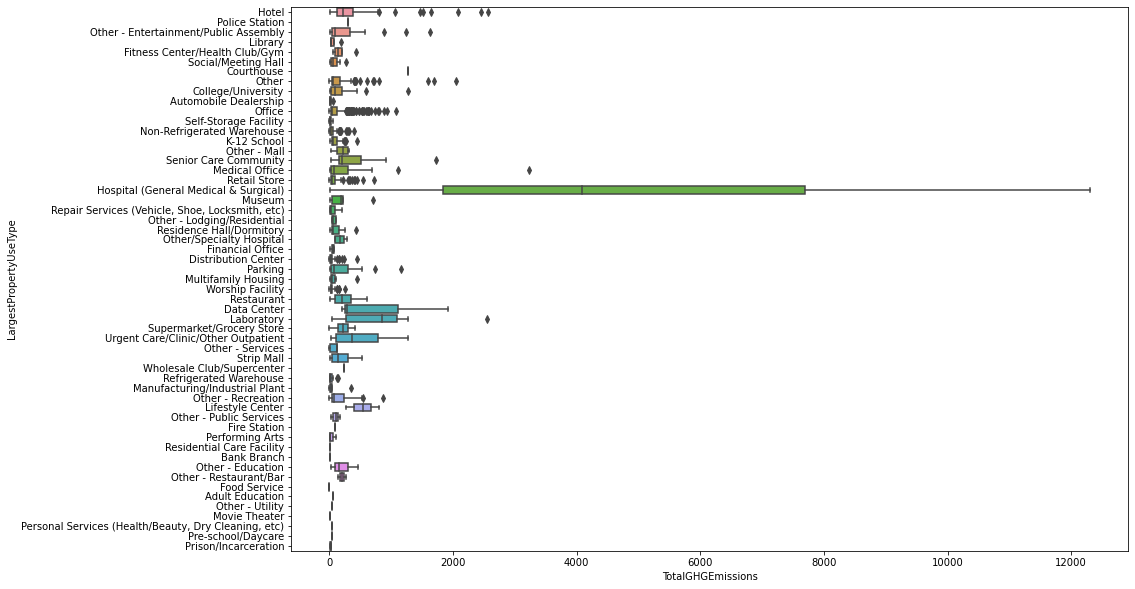

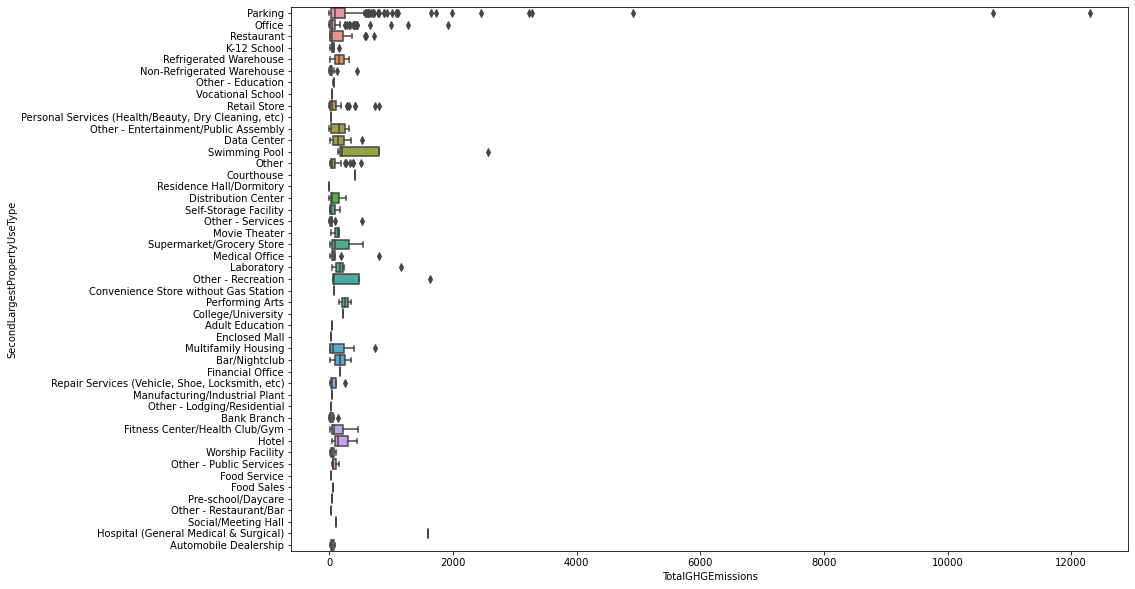

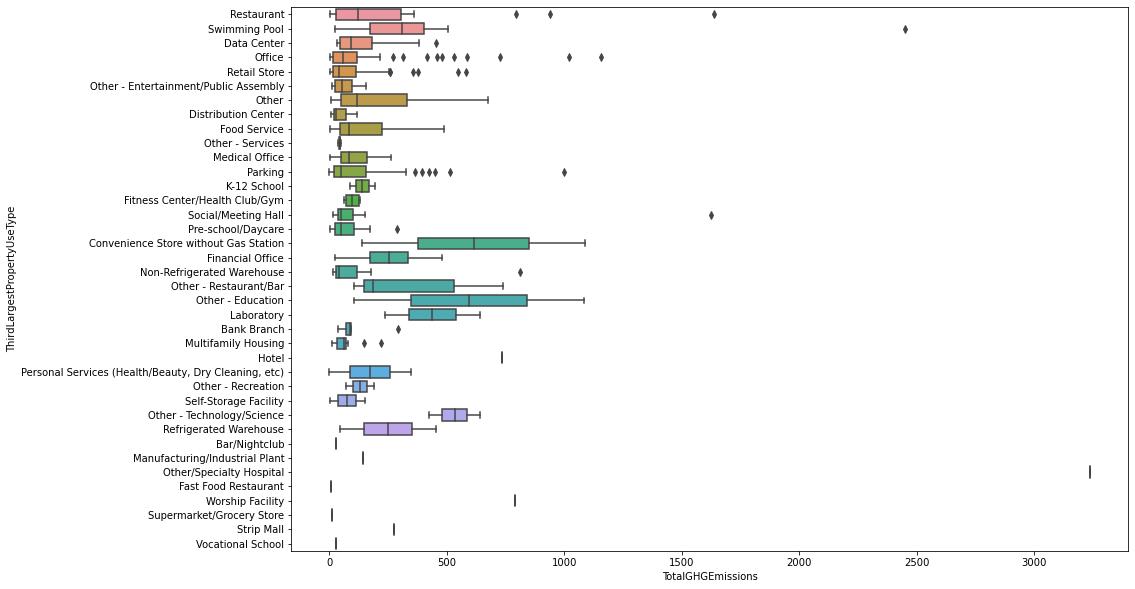

In [93]:
for var in l_var_cat :
    plt.figure(figsize=(15,10))
    sns.boxplot(x=target2, y=var,data=df_nett)

#### (d) Visualisation  de la relation entre les différentes variables

In [94]:
nuage_points(df_nett, 'PropertyGFATotal', 'NumberofBuildings')

In [95]:
nuage_points(df_nett, 'PropertyGFATotal', 'NumberofFloors')

In [102]:
def cor(data) :
    mask_cor = np.triu(np.ones_like(data.corr(method='pearson'))) 
    plt.figure(figsize=(15,5)) 
    sns.heatmap(data.corr(), mask=mask_cor, annot=True)
    plt.show()

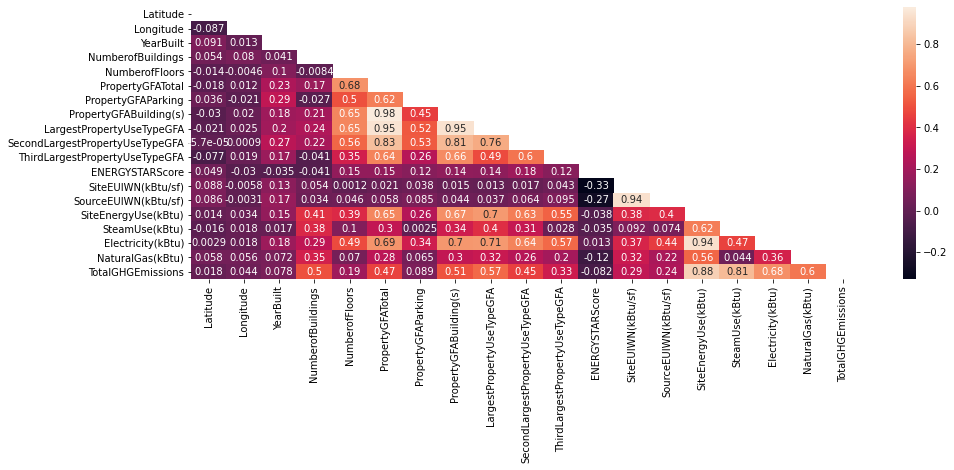

In [103]:
# Corrélation 
cor(df_nett)

#### (e) Les variables longitude et latitude

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

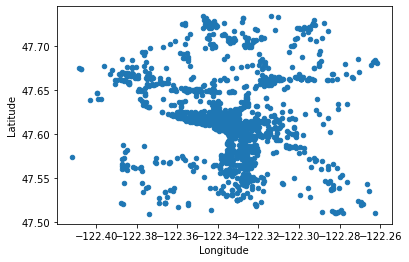

In [104]:
df_nett.plot(kind="scatter", x="Longitude", y="Latitude")

## D) Nettoyage

### 1- Les valeurs aberrantes (outliers)

On a vu dans la partie précédente que les valeurs extrêmes en se basant sur les deux variables cibles sont à partir de 200M pour la variable cible 'SiteEnergyUseWN(kBtu)' et 6k pour la variable 'TotalGHGEmissions'. On supprimera ces valeurs là.

In [108]:
df_nett_mod = df_nett.copy()
df_nett_mod = df_nett_mod[(df_nett_mod['TotalGHGEmissions'] <= 6000) & (df_nett_mod['TotalGHGEmissions'] > 0)] 
df_nett_mod = df_nett_mod[(df_nett_mod['SiteEnergyUse(kBtu)'] <=  200000000) & (df_nett_mod['SiteEnergyUse(kBtu)'] > 0)]
df_nett_mod.shape

(1516, 26)

On a vu aussi que les variables 'NumberofFloors' et 'NumberofBuildings' ont des valeurs aberrantes par rapport à la variable 'PropertyGFATotal'

In [109]:
df_nett_mod = df_nett_mod[df_nett_mod['NumberofFloors'] < 60]
df_nett_mod = df_nett_mod[df_nett_mod['NumberofBuildings'] < 40]
df_nett_mod.shape

(1513, 26)

### 2- Imputation des valeurs manquantes

On sait que les bâtiments peuvent avoir 3 types d'utilisation : l'utilisation principale, secondaire et troisième. Ainsi, on remplacera les bâtiments qui n'ont pas de second utilisation par 'No_SecondUse' et leurs surfaces par 0. Pareil pour la troisième utilisation.

In [110]:
df_f = df_nett_mod.copy()
df_f['SecondLargestPropertyUseTypeGFA']= df_f['SecondLargestPropertyUseTypeGFA'].fillna(0)
df_f['SecondLargestPropertyUseType'] = df_f['SecondLargestPropertyUseType'].fillna('No_SecondUse')
df_f['ThirdLargestPropertyUseTypeGFA']= df_f['ThirdLargestPropertyUseTypeGFA'].fillna(0)
df_f['ThirdLargestPropertyUseType'] = df_f['ThirdLargestPropertyUseType'].fillna('No_ThirdUse')

In [111]:
df_f.head()

BuildingType PrimaryPropertyType Neighborhood  Latitude  Longitude  \
0  NonResidential               Hotel     DOWNTOWN  47.61220 -122.33799   
1  NonResidential               Hotel     DOWNTOWN  47.61317 -122.33393   
2  NonResidential               Hotel     DOWNTOWN  47.61393 -122.33810   
3  NonResidential               Hotel     DOWNTOWN  47.61412 -122.33664   
4  NonResidential               Hotel     DOWNTOWN  47.61375 -122.34047   

   YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0       1927                1.0              12             88434   
1       1996                1.0              11            103566   
2       1969                1.0              41            956110   
3       1926                1.0              10             61320   
4       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                 No_SecondUse                              0.0   
1                      Parking                          15064.0   
2                 No_SecondUse                              0.0   
3                 No_SecondUse                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                 No_ThirdUse                             0.0   
1                  Restaurant                          4622.0   
2                 No_ThirdUse                             0.0   
3                 No_ThirdUse                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0             60.0           84.300003            189.000000   
1             61.0           97.900002            179.399994   
2             43.0           97.699997            244.100006   
3             56.0          113.300003            224.000000   
4             75.0          118.699997            215.600006   

   SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0            7226362.5      2003882.00          3946027.0         1276453.0   
1            8387933.0            0.00          3242851.0         5145082.0   
2           72587024.0     21566554.00         49526664.0         1493800.0   
3            6794584.0      2214446.25          2768924.0         1811213.0   
4           14172606.0            0.00          5368607.0         8803998.0   

   TotalGHGEmissions  
0             249.98  
1             295.86  
2            2089.28  
3             286.43  
4             505.01

<AxesSubplot:>

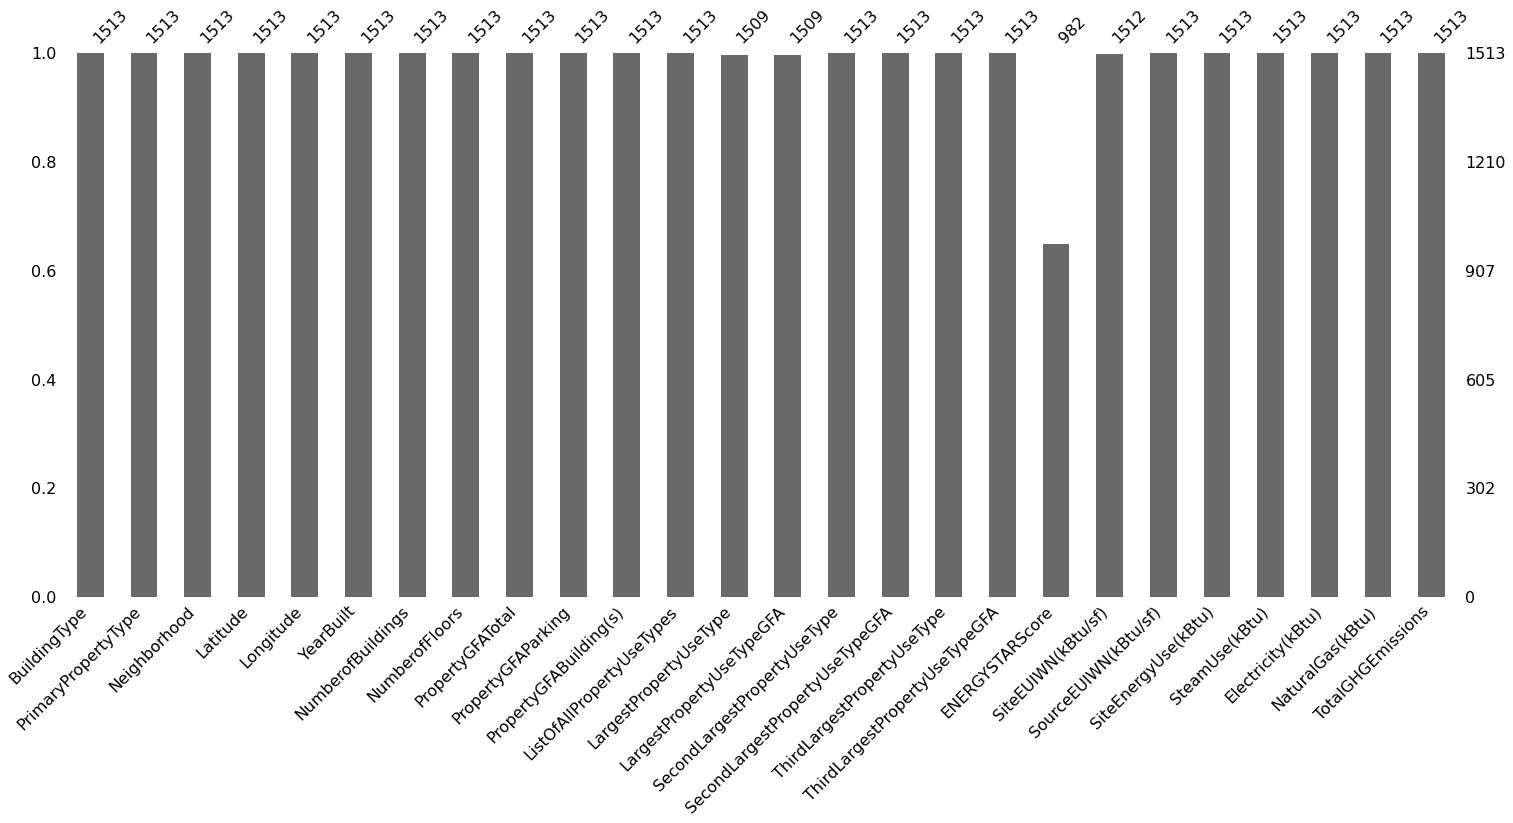

In [112]:
# Taux de remplissage des colonnes après élimination des variables qui ont un taux de remplisage faible
msn.bar(df_f)

**Imputation des autres variables restantes**

In [113]:
def imputation_num(data, col) :
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_num  = pd.DataFrame(data.select_dtypes(include=numerics)).columns.tolist()
    col_num.remove(col)
    data_res = data[col_num].apply(lambda x:x.fillna(x.mean()))
    date_res = pd.DataFrame(data_res.select_dtypes(include=numerics))
    return data_res

In [114]:
def imputation_cat(data):
    cat = ['object','bool']
    col_cat = pd.DataFrame(data.select_dtypes(include=cat)).columns.tolist()
    data_res = data[col_cat].apply(lambda x:x.fillna(x.value_counts().index[0]))
    date_res = pd.DataFrame(data_res.select_dtypes(include=cat))
    return data_res

In [115]:
df_f.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')

In [116]:
data_imp_num = imputation_num(df_f,'ENERGYSTARScore')
data_imp_num

Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0     47.61220 -122.33799       1927                1.0              12   
1     47.61317 -122.33393       1996                1.0              11   
2     47.61393 -122.33810       1969                1.0              41   
3     47.61412 -122.33664       1926                1.0              10   
4     47.61375 -122.34047       1980                1.0              18   
...        ...        ...        ...                ...             ...   
3370  47.54067 -122.37441       1982                1.0               1   
3372  47.59625 -122.32283       2004                1.0               1   
3373  47.63644 -122.35784       1974                1.0               1   
3374  47.52832 -122.32431       1989                1.0               1   
3375  47.53939 -122.29536       1938                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               175580               62000                  113580   
...                ...                 ...                     ...   
3370             18261                   0                   18261   
3372             16000                   0                   16000   
3373             13157                   0                   13157   
3374             14101                   0                   14101   
3375             18258                   0                   18258   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                       88434.0                              0.0   
1                       83880.0                          15064.0   
2                      756493.0                              0.0   
3                       61320.0                              0.0   
4                      123445.0                          68009.0   
...                         ...                              ...   
3370                    18261.0                              0.0   
3372                    16000.0                              0.0   
3373                     7583.0                           5574.0   
3374                     6601.0                           6501.0   
3375                     8271.0                           8000.0   

      ThirdLargestPropertyUseTypeGFA  SiteEUIWN(kBtu/sf)  \
0                                0.0           84.300003   
1                             4622.0           97.900002   
2                                0.0           97.699997   
3                                0.0          113.300003   
4                                0.0          118.699997   
...                              ...                 ...   
3370                             0.0           56.200001   
3372                             0.0           65.900002   
3373                             0.0          460.100006   
3374                           484.0           55.500000   
3375                          1108.0           70.900002   

      SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0               189.000000         7.226362e+06      2003882.00   
1               179.399994         8.387933e+06            0.00   
2               244.100006         7.258702e+07     21566554.00   
3               224.000000         6.794584e+06      2214446.25   
4               215.600006         1.417261e+07            0.00   
...                    ...                  ...             ...   
3370            136.600006         9.320821e+05            0.00   
3372            118.900001         9.502762e+05            0.00   
3373            767.799988         5.765898e+06            0.00   
3374            110.800003         7.194712e+05         

In [117]:
data_imp_cat = imputation_cat(df_f)
data_imp_cat

BuildingType PrimaryPropertyType         Neighborhood  \
0         NonResidential               Hotel             DOWNTOWN   
1         NonResidential               Hotel             DOWNTOWN   
2         NonResidential               Hotel             DOWNTOWN   
3         NonResidential               Hotel             DOWNTOWN   
4         NonResidential               Hotel             DOWNTOWN   
...                  ...                 ...                  ...   
3370  Nonresidential COS               Other             DELRIDGE   
3372  Nonresidential COS               Other             DOWNTOWN   
3373  Nonresidential COS               Other  MAGNOLIA QUEEN ANNE   
3374  Nonresidential COS  Mixed Use Property     GREATER DUWAMISH   
3375  Nonresidential COS  Mixed Use Property     GREATER DUWAMISH   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                                                 Hotel   
3                                                 Hotel   
4                         Hotel, Parking, Swimming Pool   
...                                                 ...   
3370                                 Other - Recreation   
3372                                 Other - Recreation   
3373  Fitness Center/Health Club/Gym, Other - Recrea...   
3374  Fitness Center/Health Club/Gym, Food Service, ...   
3375  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType    SecondLargestPropertyUseType  \
0                     Hotel                    No_SecondUse   
1                     Hotel                         Parking   
2                     Hotel                    No_SecondUse   
3                     Hotel                    No_SecondUse   
4                     Hotel                         Parking   
...                     ...                             ...   
3370     Other - Recreation                    No_SecondUse   
3372     Other - Recreation                    No_SecondUse   
3373     Other - Recreation  Fitness Center/Health Club/Gym   
3374     Other - Recreation  Fitness Center/Health Club/Gym   
3375     Other - Recreation  Fitness Center/Health Club/Gym   

     ThirdLargestPropertyUseType  
0                    No_ThirdUse  
1                     Restaurant  
2                    No_ThirdUse  
3                    No_ThirdUse  
4                  Swimming Pool  
...                          ...  
3370                 No_ThirdUse  
3372                 No_ThirdUse  
3373               Swimming Pool  
3374          Pre-school/Daycare  
3375          Pre-school/Daycare  

[1513 rows x 7 columns]

In [118]:
data_final = pd.concat([data_imp_cat, data_imp_num, df_f['ENERGYSTARScore']], axis=1)
data_final.shape

(1513, 26)

<AxesSubplot:>

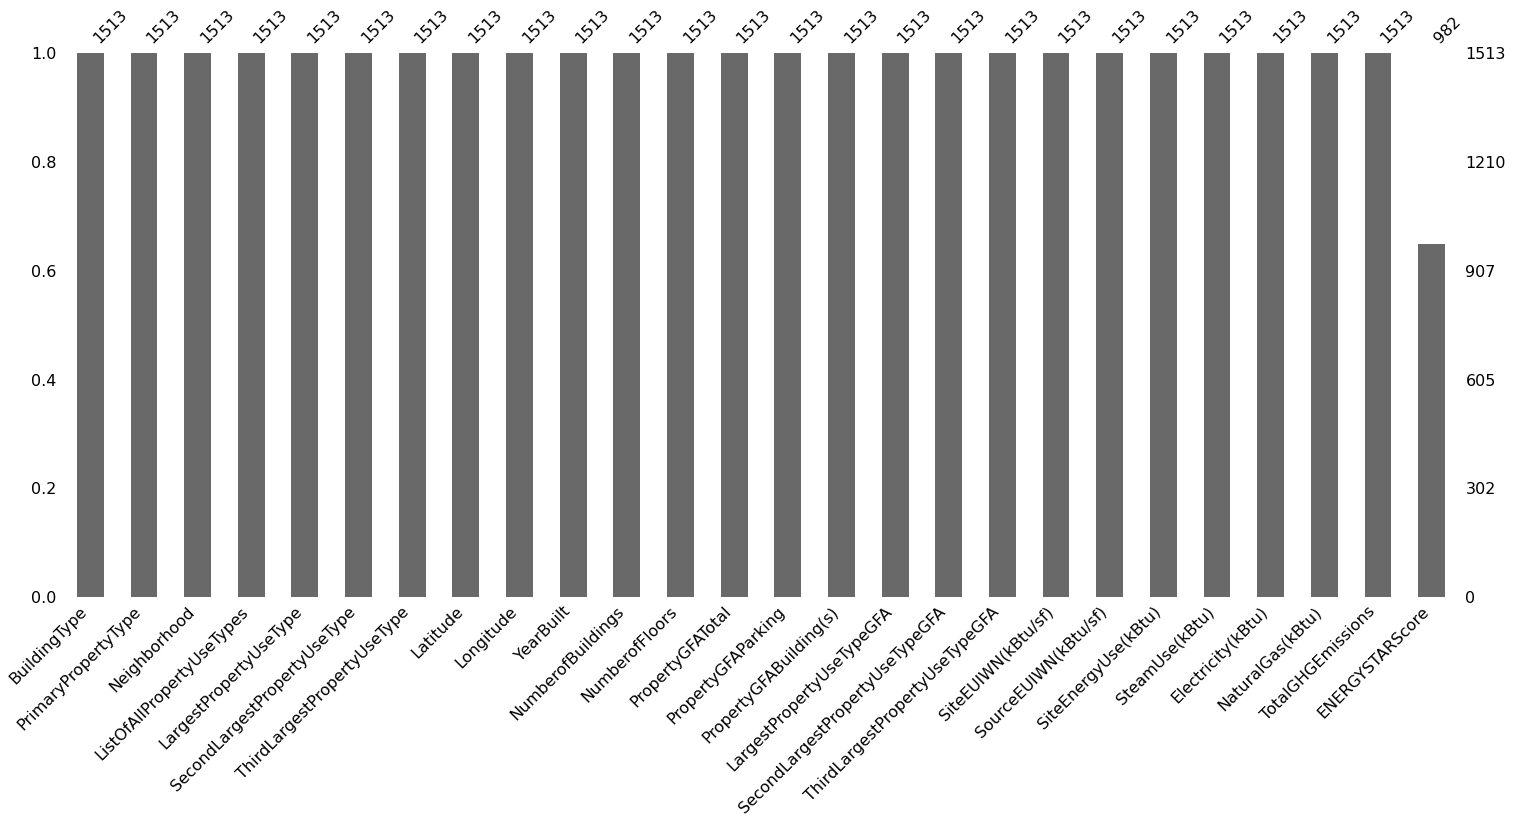

In [121]:
# Taux de remplissage des colonnes*
plt.figure(figsize=(7,7))
msn.bar(data_final)

In [120]:
data_final.to_csv('C:/Users/salma/OneDrive/Bureau/Formation en alternance 2021_2023/Formation OpenClassRooms/Projets/Projet 4/projet_nouvelle_version/Data/dataElec_clean_f.csv',index = False)